In [236]:
import numpy as np
import pandas as pd

In [237]:
df = pd.read_csv("data_grupo11.csv")
df.head(20)

,Unnamed: 0,link,referencia,latitud,longitud,direccion,distrito,etapa,fecha_entrega,financiamiento,areas_comunes,tipo,tipologia,piso,dormitorios,area,precio
0,9,https://nexoinmobiliario.pe/proyecto/venta-de-departamento-2706-high-line-santiago-de-surco-lima-lima-tribeca-inmobiliaria,HIGH LINE,-12.115975,-76.990975,Av. Caminos del Inca 508 esquina con Jr. Cañón del Pato,Santiago De Surco,En construcción,"31 de Diciembre, 2025",BBVA,"['Área de juegos para niños', 'Areas verdes', 'Ascensor directo', 'Gimnasio', 'Jardin de niños', 'Lobby', 'Piscina', 'Sala Bar', 'Salon Gourmet', 'Techos Ecológicos', 'Terraza', 'Zona de Parrillas']",flat,TIPO 10,Pisos: Entre 2 al 16,1,55.66 m2,"S/ 464,250"
1,3908,https://nexoinmobiliario.pe/proyecto/venta-de-departamento-2261-vista-marina-356-chorrillos-lima-lima-tale-inmobiliaria,VISTA MARINA 356,-12.159132,-77.024261,Malecón Costa Sur 356,Chorrillos,Entrega inmediata,"31 de Julio, 2024",Banco Scotiabank,"['Gimnasio', 'Lobby', 'Sala de Niños', 'Terraza']",flat,X05,Piso: 2,3,129.97 m2,"$ 346,000"
2,5827,https://nexoinmobiliario.pe/proyecto/venta-de-departamento-2037-pueblo-libre-pueblo-libre-lima-lima-ee-inmobiliaria,Pueblo Libre,-12.083753,-77.065885,Av. La Marina 449,Pueblo Libre,Entrega inmediata,"29 de Febrero, 2024",Banco BANBIF,['Lobby'],flat,701,Piso: 7,3,80.97 m2,"S/ 496,000"
3,4880,https://nexoinmobiliario.pe/proyecto/venta-de-departamento-3067-cosmos-miraflores-lima-lima-llosa-edificaciones-urban,COSMOS,-12.118554,-77.039877,óvalo julio ramon ribeyro,Miraflores,En planos,"30 de Julio, 2026",Financiamiento Propio,"['Gimnasio', 'Lobby', 'Sala Bar', 'Sala de Internet', 'Salon Gourmet', 'Terraza', 'Zona de Lavandería', 'Zona de Parrillas', 'Otros']",flat,15,Pisos: Entre 11 al 21,2,104.03 m2,"$ 322,389"
4,2194,https://nexoinmobiliario.pe/proyecto/venta-de-departamento-3325-edificio-sialia-jesus-maria-lima-lima-grupo-cygnus,Edificio Sialia,-12.073697,-77.046661,"Av. 6 de Agosto 1184, Jesús María",Jesus Maria,En planos,"31 de Mayo, 2027",Banco BCP,"['Jardin interior', 'Lobby', 'Sala de Internet', 'Sala de usos Múltiples', 'Terraza', 'Zona de Parrillas', 'Otros']",flat,Tipo 3,Pisos: Entre 2 al 16,2,48.95 m2,"S/ 335,993"
5,6297,https://nexoinmobiliario.pe/proyecto/venta-de-departamento-2841-botanika-jesus-maria-lima-lima-san-charbel-edificaciones,Botanika,-12.081009,-77.057121,Av. Garzón 2160,Jesus Maria,En construcción,"30 de Noviembre, 2025",Banco BCP,"['Área de juegos para niños', 'Gimnasio', 'Lobby', 'Piscina', 'Sala Bar', 'Sala de Niños', 'Sala de usos Múltiples', 'Terraza', 'Video vigilancia', 'Zona de Parrillas', 'Otros']",flat,TIPO 3,Piso: 3,1,29.40 m2,"S/ 230,000"
6,5773,https://nexoinmobiliario.pe/proyecto/venta-de-departamento-3337-vanderghen-400-miraflores-lima-lima-aurora-grupo-inmobiliario,Vanderghen 400,-12.109729,-77.040688,Av. Jorge Vanderghen 406,Miraflores,En planos,"01 de Junio, 2026",Banco Scotiabank,['Lobby'],duplex,PENTHOUSE 5,Piso: 9,2,142.00 m2,"$ 391,000"
7,4374,https://nexoinmobiliario.pe/proyecto/venta-de-departamento-3030-look-feel-etapa-2-santiago-de-surco-lima-lima-grupo-t&c,LOOK&FEEL - Etapa 2,-12.105015,-76.966286,Calle Aldebaran 178,Santiago De Surco,En planos,"31 de Marzo, 2026",Financiamiento Propio,"['Boulevard peatonal', 'Lobby', 'Piscina', 'Sala Bar', 'Sala de usos Múltiples', 'Salon Gourmet', 'Terraza', 'Zona de Parrillas']",flat,Tipo 9B,Piso: 1,1,92.84 m2,"S/ 586,036"
8,2664,https://nexoinmobiliario.pe/proyecto/venta-de-departamento-2698-hara-etapa-5-la-victoria-lima-lima-grupo-lar,Hara (Etapa 5),-12.081167,-77.012019,"Calle Fermin tanguis 160, La victoria",La Victoria,En construcción,"30 de Septiembre, 2025",Banco BANBIF,"['Área de juegos para niños', 'Gimnasio', 'Lobby', 'Sala de cine', 'Terraza', 'Video vigilancia', 'Zona de Lavandería', 'Zona de Parrillas', 'Otros']",flat,X01-C,Pisos: Entre 4 al 18,3,69.00 m2,"S/ 489,020"
9,1959,https://nexoinmobiliario.pe/proyecto/venta-de-departamento-3390-residencial-seiss-comas-lima-lima-lider,RESIDENCIAL SEISS,-11.

In [238]:
df.shape

(5463, 17)

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5463 entries, 0 to 5462
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5463 non-null   int64  
 1   link            5463 non-null   object 
 2   referencia      5463 non-null   object 
 3   latitud         5463 non-null   float64
 4   longitud        5463 non-null   float64
 5   direccion       5463 non-null   object 
 6   distrito        5463 non-null   object 
 7   etapa           5463 non-null   object 
 8   fecha_entrega   5463 non-null   object 
 9   financiamiento  5463 non-null   object 
 10  areas_comunes   5463 non-null   object 
 11  tipo            5463 non-null   object 
 12  tipologia       5463 non-null   object 
 13  piso            5463 non-null   object 
 14  dormitorios     5463 non-null   int64  
 15  area            5463 non-null   object 
 16  precio          5463 non-null   object 
dtypes: float64(2), int64(2), object(1

In [240]:
relevant_cols = ["distrito", "etapa", "financiamiento", "areas_comunes", "tipo", "dormitorios", "area", "precio"]
#areas comunes onehotencoding

In [241]:
relevant_df = pd.DataFrame(df[relevant_cols])

In [242]:
for col in df.columns:
    if col in ["etapa", "tipo"]:
        print(set(df[col]))

{'En planos', 'En construcción', 'Entrega inmediata'}
{'flat', 'duplex'}


In [243]:
relevant_df["etapa"] = pd.Categorical(relevant_df["etapa"], categories=["En planos", "En construcción", "Entrega inmediata"], ordered=True)
relevant_df["tipo"] = pd.Categorical(relevant_df["tipo"], categories=["flat", "duplex"], ordered=True)

In [244]:
relevant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5463 entries, 0 to 5462
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   distrito        5463 non-null   object  
 1   etapa           5463 non-null   category
 2   financiamiento  5463 non-null   object  
 3   areas_comunes   5463 non-null   object  
 4   tipo            5463 non-null   category
 5   dormitorios     5463 non-null   int64   
 6   area            5463 non-null   object  
 7   precio          5463 non-null   object  
dtypes: category(2), int64(1), object(5)
memory usage: 267.1+ KB


In [245]:
def convertiradolares(row):
    if row['moneda']=='PEN':
        return row['precio_float']/3.8
    else:
        return row['precio_float']


In [246]:
relevant_df['precio_float']=relevant_df['precio'].str.replace('S/ ','').str.replace('$ ','').str.replace(',','').astype(float)
relevant_df['area_float']=relevant_df['area'].str.replace(' m2','').astype(float)
relevant_df['moneda'] = relevant_df['precio'].str.extract(r'(S/|\$)')[0].apply(lambda x: 'PEN' if 'S/' in x else 'USD')
relevant_df['precio_soles']=relevant_df.apply(convertiradolares, axis=1)

In [247]:
relevant_df = relevant_df.drop(["precio", "area", "precio_float", "moneda"], axis=1)
relevant_df.head(10)

,distrito,etapa,financiamiento,areas_comunes,tipo,dormitorios,area_float,precio_soles
0,Santiago De Surco,En construcción,BBVA,"['Área de juegos para niños', 'Areas verdes', 'Ascensor directo', 'Gimnasio', 'Jardin de niños', 'Lobby', 'Piscina', 'Sala Bar', 'Salon Gourmet', 'Techos Ecológicos', 'Terraza', 'Zona de Parrillas']",flat,1,55.66,122171.052632
1,Chorrillos,Entrega inmediata,Banco Scotiabank,"['Gimnasio', 'Lobby', 'Sala de Niños', 'Terraza']",flat,3,129.97,346000.000000
2,Pueblo Libre,Entrega inmediata,Banco BANBIF,['Lobby'],flat,3,80.97,130526.315789
3,Miraflores,En planos,Financiamiento Propio,"['Gimnasio', 'Lobby', 'Sala Bar', 'Sala de Internet', 'Salon Gourmet', 'Terraza', 'Zona de Lavandería', 'Zona de Parrillas', 'Otros']",flat,2,104.03,322389.000000
4,Jesus Maria,En planos,Banco BCP,"['Jardin interior', 'Lobby', 'Sala de Internet', 'Sala de usos Múltiples', 'Terraza', 'Zona de Parrillas', 'Otros']",flat,2,48.95,88419.210526
5,Jesus Maria,En construcción,Banco BCP,"['Área de juegos para niños', 'Gimnasio', 'Lobby', 'Piscina', 'Sala Bar', 'Sala de Niños', 'Sala de usos Múltiples', 'Terraza', 'Video vigilancia', 'Zona de Parrillas', 'Otros']",flat,1,29.40,60526.315789
6,Miraflores,En planos,Banco Scotiabank,['Lobby'],duplex,2,142.00,391000.000000
7,Santiago De Surco,En planos,Financiamiento Propio,"['Boulevard peatonal', 'Lobby', 'Piscina', 'Sala Bar', 'Sala de usos Múltiples', 'Salon Gourmet', 'Terraza', 'Zona de Parrillas']",flat,1,92.84,154220.000000
8,La Victoria,En construcción,Banco BANBIF,"['Área de juegos para niños', 'Gimnasio', 'Lobby', 'Sala de cine', 'Terraza', 'Video vigilancia', 'Zona de Lavandería', 'Zona de Parrillas', 'Otros']",flat,3,69.00,128689.473684
9,Comas,En planos,BBVA,"['Areas verdes', 'Boulevard peatonal', 'Cuarto servicio', 'Jardin interior', 'Lobby', 'Sala de usos Múltiples', 'Terraza', 'Zona de Parrillas', 'Otros']",flat,2,57.42,68078.947368


In [248]:
import ast

def convert_to_list(value):
    try:
        return ast.literal_eval(value)
    except (ValueError, SyntaxError):
        return []

In [249]:
relevant_df['areas_comunes'] = relevant_df['areas_comunes'].apply(convert_to_list)

In [250]:
one_hot_df = relevant_df.explode('areas_comunes')
one_hot_df = pd.get_dummies(one_hot_df, columns=['areas_comunes'])

# Volver a agrupar por índice si es necesario
one_hot_df = one_hot_df.groupby(level=0).max()
one_hot_df

,distrito,etapa,financiamiento,tipo,dormitorios,area_float,precio_soles,areas_comunes_Areas verdes,areas_comunes_Ascensor directo,areas_comunes_Boulevard peatonal,...,areas_comunes_Sala de usos Múltiples,areas_comunes_Salon Gourmet,areas_comunes_Sauna,areas_comunes_Techo Panorámico,areas_comunes_Techos Ecológicos,areas_comunes_Terraza,areas_comunes_Video vigilancia,areas_comunes_Zona de Lavandería,areas_comunes_Zona de Parrillas,areas_comunes_Área de juegos para niños
0,Santiago De Surco,En construcción,BBVA,flat,1,55.66,122171.052632,True,True,False,...,False,True,False,False,True,True,False,False,True,True
1,Chorrillos,Entrega inmediata,Banco Scotiabank,flat,3,129.97,346000.000000,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,Pueblo Libre,Entrega inmediata,Banco BANBIF,flat,3,80.97,130526.315789,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Miraflores,En planos,Financiamiento Propio,flat,2,104.03,322389.000000,False,False,False,...,False,True,False,False,False,True,False,True,True,False
4,Jesus Maria,En planos,Banco BCP,flat,2,48.95,88419.210526,False,False,False,...,True,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5458,La Victoria,En construcción,Banco Interbank,flat,1,34.09,62250.526316,False,False,False,...,True,False,False,True,False,True,False,True,True,True
5459,San Miguel,En planos,Banco BCP,flat,3,71.00,100210.526316,False,False,False,...,False,False,False,False,False,True,False,False,True,False
5460,Surquillo,En planos,Banco BCP,flat,2,94.55,171868.421053,True,False,False,...,True,False,False,False,False,True,True,True,True,True
5461,Miraflores,En construcción,Banco BCP,flat,2,61.80,108458.947368,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Text(0.5, 1.0, 'Boxplot de Precios de las Propiedades')

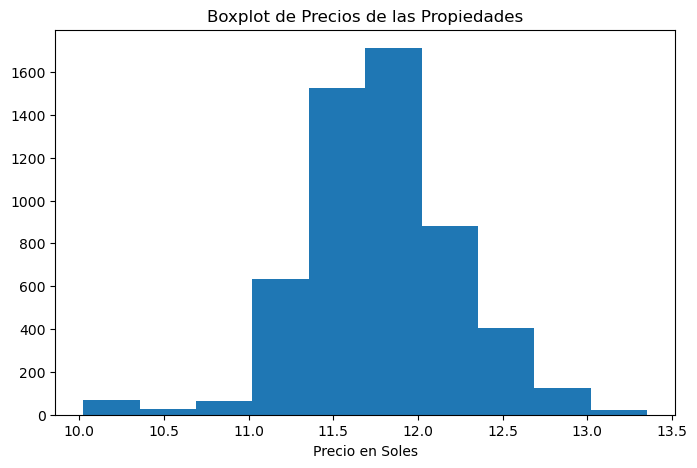

In [251]:
import matplotlib.pyplot as plt
target = relevant_df['precio_soles']
plt.figure(figsize=(8, 5))
plt.hist(np.log(target))
plt.xlabel('Precio en Soles')
plt.title('Boxplot de Precios de las Propiedades')

Text(0.5, 1.0, 'Boxplot de Precios de las Propiedades')

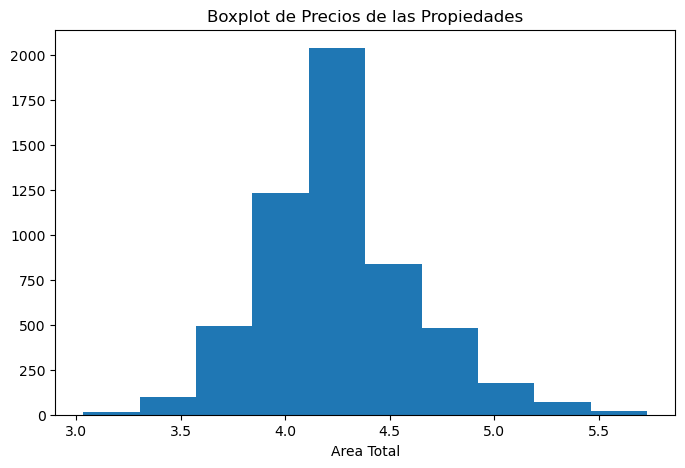

In [252]:
feat = relevant_df['area_float']
plt.figure(figsize=(8, 5))
plt.hist(np.log(feat))
plt.xlabel('Area Total')
plt.title('Boxplot de Precios de las Propiedades')

In [253]:
one_hot_df["etapa"] = one_hot_df["etapa"].cat.codes
one_hot_df["tipo"] = one_hot_df["tipo"].cat.codes
one_hot_df["precio_soles"] = np.log(one_hot_df["precio_soles"] )
one_hot_df["area_float"] = np.log(one_hot_df["area_float"])

In [254]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['distrito', 'financiamiento']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    one_hot_df[col] = le.fit_transform(one_hot_df[col])
    label_encoders[col] = le

In [255]:
from sklearn.preprocessing import StandardScaler

X=one_hot_df.drop("precio_soles", axis=1)
Y=one_hot_df['precio_soles']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.3,random_state=42)

# Linear Regression

In [256]:
from sklearn.linear_model import LinearRegression

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, Y_train)

Y_pred = model.predict(X_test_scaled)

In [257]:
Y_pred_original = np.exp(Y_pred)
Y_test_original = np.exp(Y_test)

In [267]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(Y_test_original, Y_pred_original))
mse = mean_squared_error(Y_test_original, Y_pred_original)
mae = mean_absolute_error(Y_test_original, Y_pred_original)
r2 = r2_score(Y_test_original, Y_pred_original)

# Mostrar resultados
print(f"RMSE: {rmse:.2f}")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.4f}")


RMSE: 32951.44
MSE: 1085797674.52
MAE: 22375.72
R²: 0.7546


Text(0, 0.5, 'Precio')

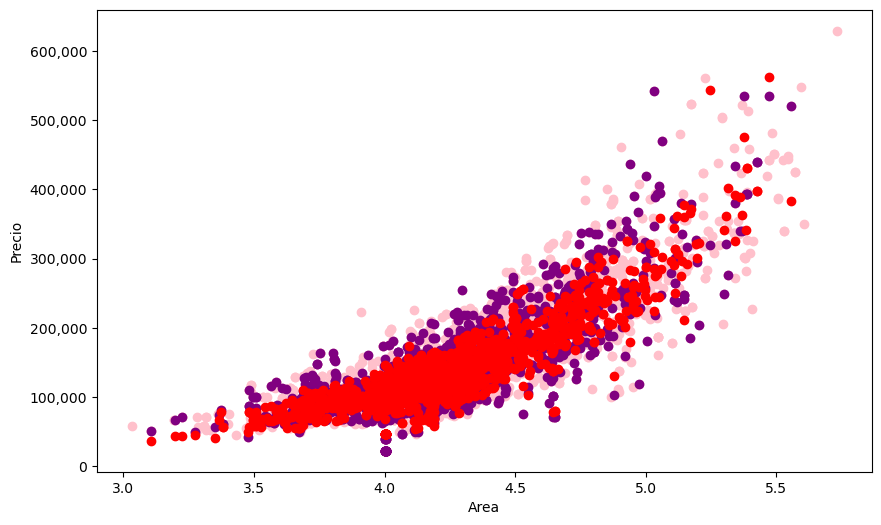

In [259]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

plt.figure(figsize=(10, 6))
plt.scatter(one_hot_df['area_float'], np.exp(one_hot_df['precio_soles']), color='pink')
plt.scatter(X_test["area_float"], Y_test_original, color='purple')
plt.scatter(X_test["area_float"], Y_pred_original, color='red')
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('Area')
plt.ylabel('Precio')

In [260]:
print(model.intercept_, "+", model.coef_)

11.782959288270838 + [ 2.62532022e-02  2.10396800e-02  1.88270748e-02 -4.34787889e-02
 -5.67444229e-02  4.03135673e-01 -3.10379179e-02  5.97918355e-03
 -8.74088048e-03 -2.16176741e-02  6.61177966e+10 -6.61177966e+10
 -2.06011655e-05  2.04581188e-02  1.49356427e-02 -1.00392555e-02
  1.58651962e-02  2.74130424e-03  7.10342659e-02 -1.17906247e-02
 -1.33080808e-03 -4.37279373e-02  3.24960312e-02  2.68624992e-03
  2.75338780e-02  4.36993465e-03 -5.48638459e-02  1.86137603e-03
 -1.58319910e-02  3.38879823e-02 -9.62238676e-03 -9.60503100e-03
  1.04003074e-02  2.45327680e-02  8.20419432e-03  2.68589030e-03
 -2.57399668e-03 -2.80283806e-02]


# Modelo 2 (?)


# Modelo 3 (?)